# 비슷한 여성 인구 구조를 가진 지역 찾기<br>
### 1. '2021년 10월 연령별 인구현황' 데이터에서 인구 정보 추출
    지역의 총 인구 당 연령별 여성 인구 비율 (연령별 여성 인구/지역 총 인구) 구하기
### 2. 입력 받은 지역을 찾아 기준 지역으로 설정하기
### 3. 기준 지역과 가장 비슷한 여성 인구 구조를 가진 지역 찾기
    연령 별로 (기준 지역 여성 인구 비율 - 타 지역 여성 인구 비율)의 제곱 값을 모두 더해 차이가 가장 작은 지역 찾기
### 4. 꺾은선 그래프로 시각화

## 라이브러리 불러오기

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt

## 데이터 읽어오기
- csv 파일 읽어온다.
- data를 반복 가능한 객체로 설정한다.

In [2]:
f = open('age.csv', encoding='cp949')
data = csv.reader(f)
next(data)
data = list(data)

## 기준 지역 인구 구조 저장하기
- 지역 이름을 입력받는다.
- 나이별 여성 인구 수를 지역 전체 인구 수(남+여)로 나눈 비율 데이터를 저장한다.
- 행정구역코드를 제거한 지역 이름을 저장한다.

In [3]:
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력하세요: ')

for row in data :
    if name in row[0] :
        born = np.array(row[106:], dtype=int)/int(row[2] + row[105])
        name = row[0].split('(')[0]

## 기준 지역과 가장 비슷한 여성 인구 구조 가진 지역 찾기
- 나이별 여성 인구 수 비율 값을 구한다.
    - 0 으로 나누는 경우를 방지하기 위해 전체 인구 수가 0 이상일 때만 실행하도록 한다.
- 기준 지역 값을 빼서 제곱한 값을 모두 더한다.
- 최솟값을 찾는다.

In [4]:
mn = 1
result_name = ''
result = 0

for row in data :
    total = int(row[2] + row[105])
    if total > 0 :
        away = np.array(row[106:], dtype=int)/total
        s = np.sum((born-away)**2)
        if s < mn and name not in row[0] :
            mn = s
            result = away
            result_name = row[0].split('(')[0]

## 시각화
- 스타일, 사이즈, 폰트, 타이틀 등 세부적으로 그래프를 설정한다.
- 그래프를 png 파일로 저장한다.

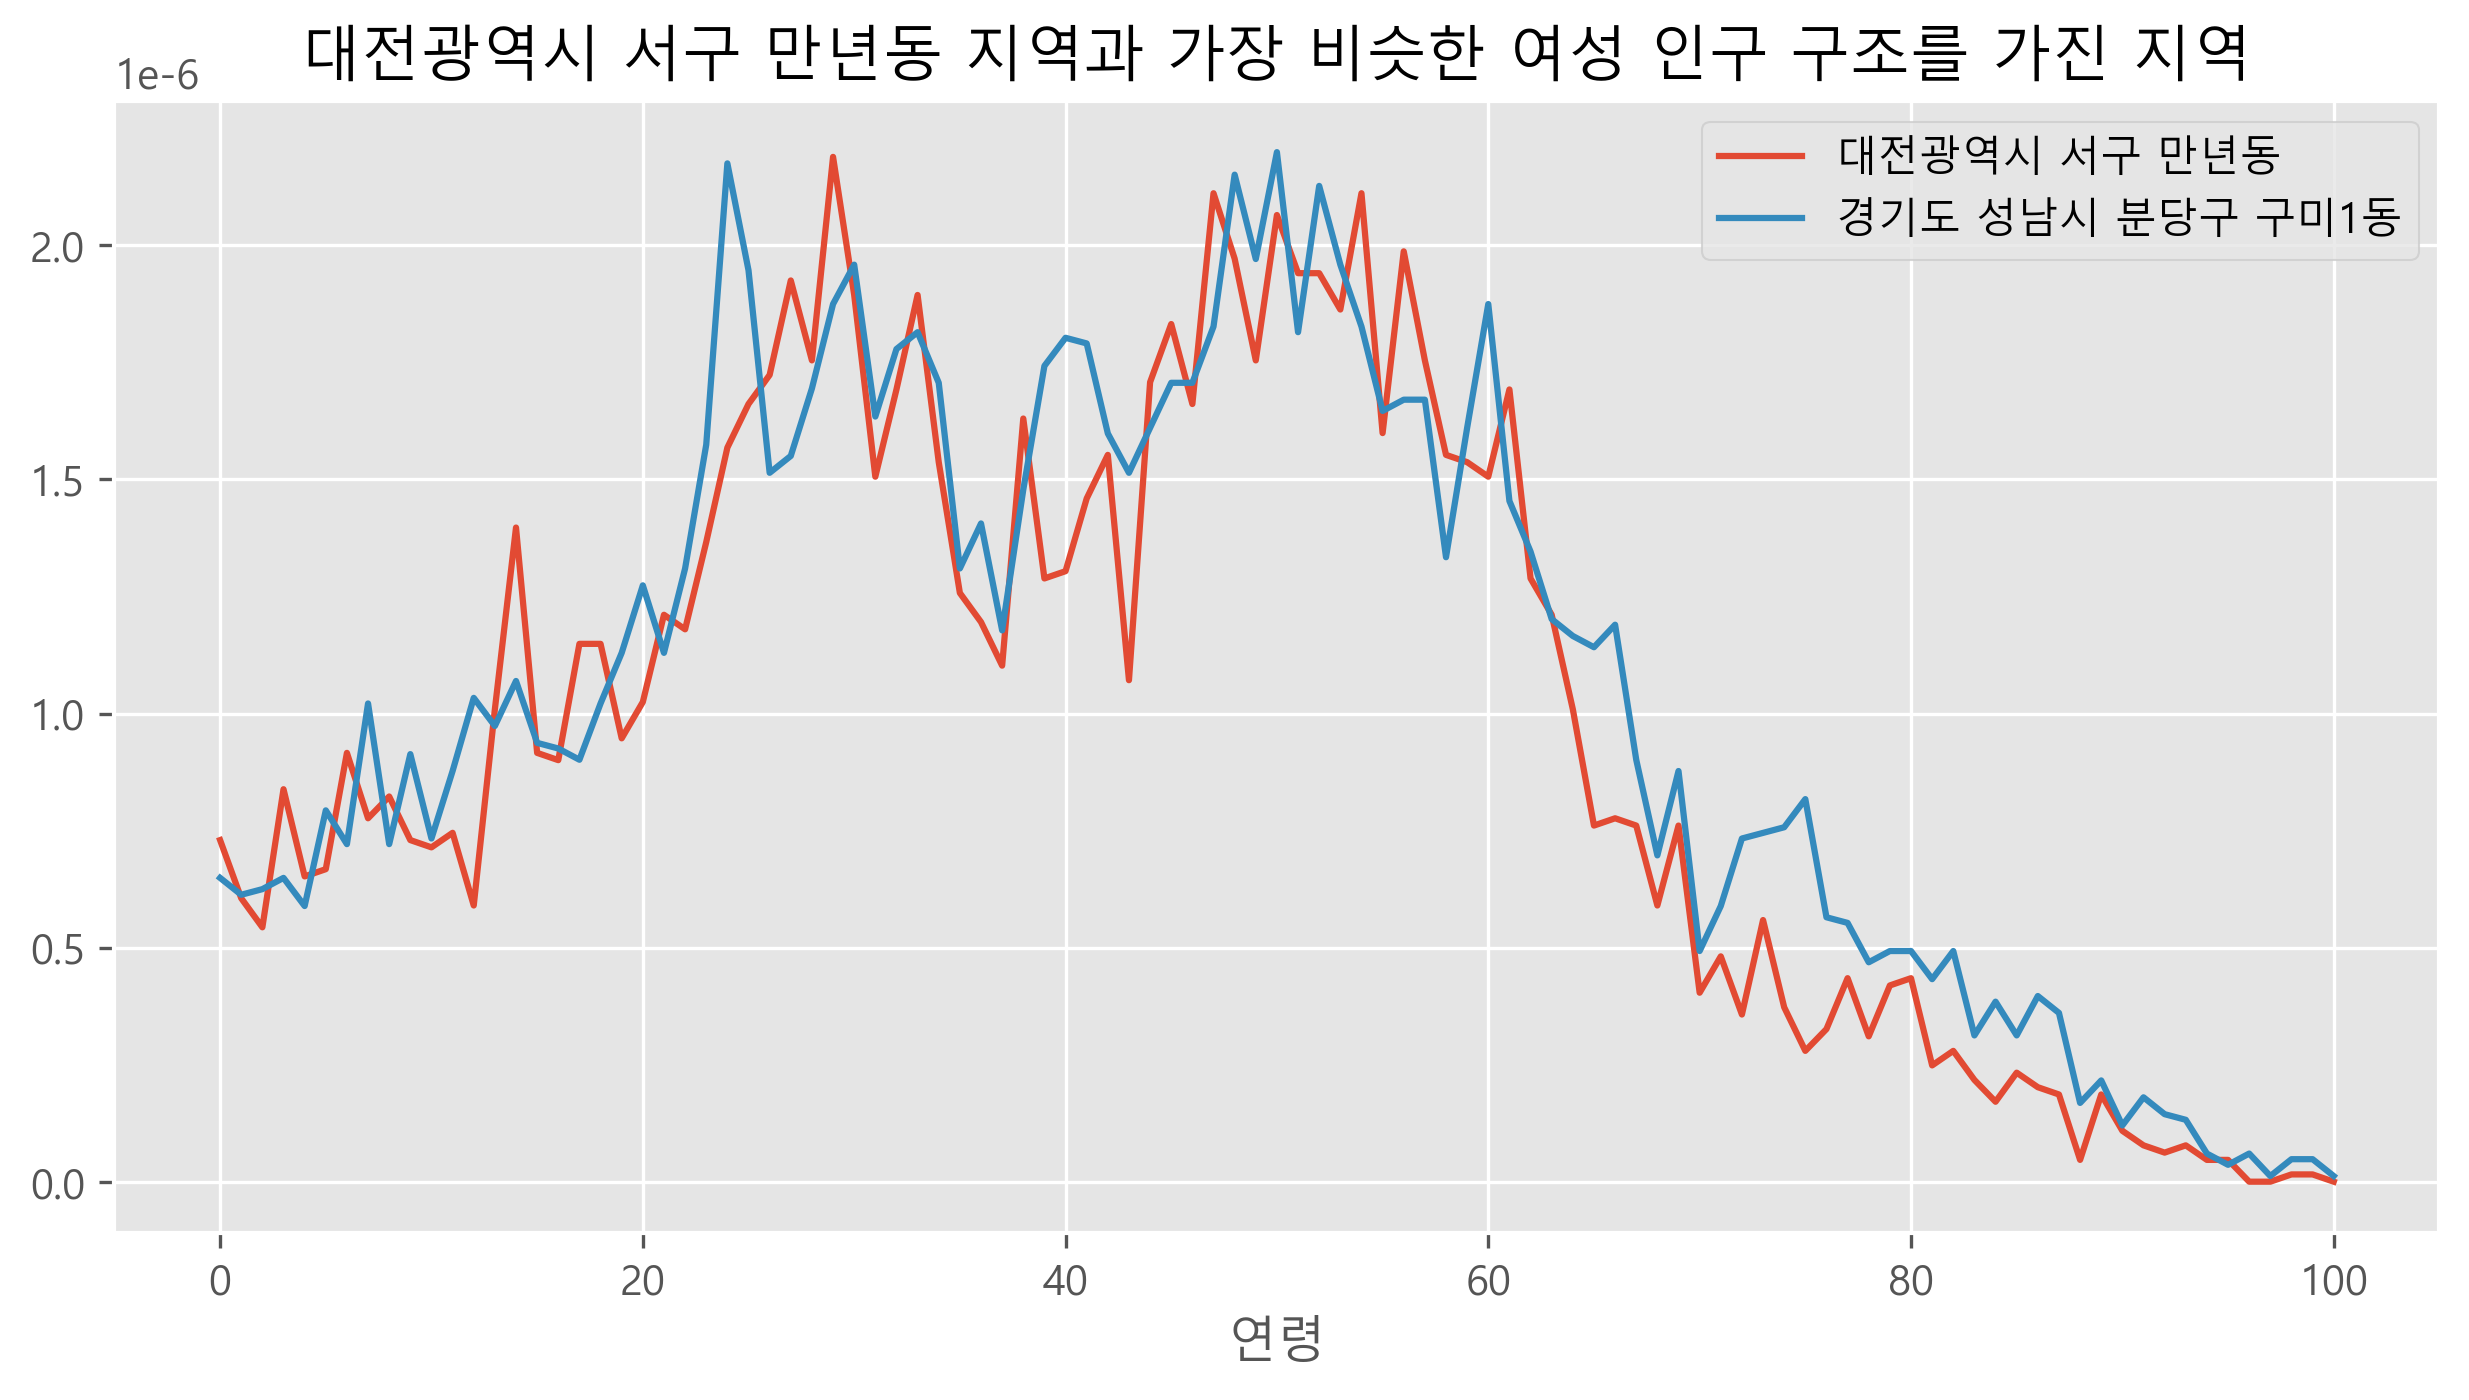

In [5]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5), dpi=300)
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.title(name + ' 지역과 가장 비슷한 여성 인구 구조를 가진 지역')
plt.plot(born, label=name)
plt.plot(result, label=result_name)
plt.xlabel('연령')
plt.legend()
plt.savefig('plot_verNumpy.png')
plt.show()